--- Loading and Exploring Data ---
Dataset loaded successfully.
First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Species Distribution:
species
Iris-

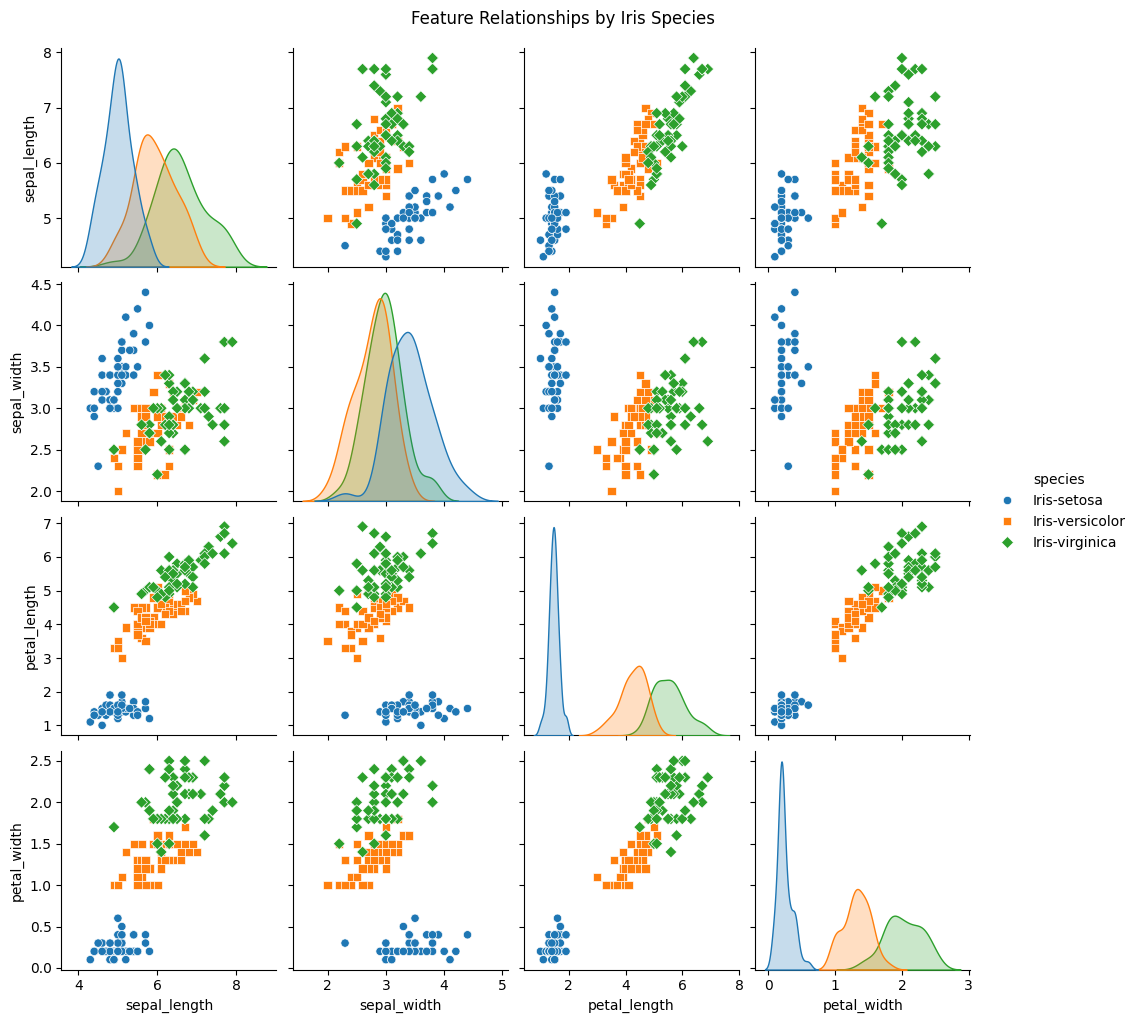


--- Building and Training Machine Learning Model ---
Model training complete.

--- Evaluating Model Performance ---
Model Accuracy: 100.00%

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


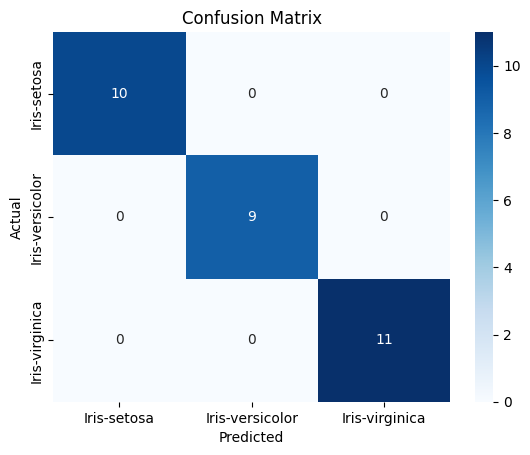


--- Project Complete ---


In [1]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 2: LOAD AND EXPLORE THE DATA
print("--- Loading and Exploring Data ---")
try:
    df = pd.read_csv('IRIS.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows:")
    print(df.head())
    print("\nDataset Info:")
    df.info() # The Iris dataset is famously clean - no missing values.
    print("\nSpecies Distribution:")
    print(df['species'].value_counts())
except FileNotFoundError:
    print("Error: 'IRIS.csv' not found. Please upload the file to your Colab session.")
    exit()

# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
print("\n--- Visualizing Data ---")
# The pairplot is the best way to see the relationships between all features
print("Displaying pairplot to show feature relationships by species...")
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Feature Relationships by Iris Species", y=1.02)
plt.show()

# STEP 4: PREPARE DATA AND TRAIN THE MODEL
print("\n--- Building and Training Machine Learning Model ---")
# Define features (X) and the target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the K-Nearest Neighbors (KNN) model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Model training complete.")

# STEP 5: EVALUATE THE MODEL
print("\n--- Evaluating Model Performance ---")
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix to see how the model performed on each class
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\n--- Project Complete ---")